In [1]:
from multi_agents.graph.builder import GraphBuilder
from multi_agents.graph.state import AgentState
import logging

USER_AGENT environment variable not set, consider setting it to identify your requests.
C:\Users\hafss\OneDrive\Desktop\stifi\multi-agent-system-for-identity-revelalion-and-reporting\src\multi_agents\tools\search_tools.py:9: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  self.tavily = TavilySearchResults()
C:\Users\hafss\OneDrive\Desktop\stifi\multi-agent-system-for-identity-revelalion-and-reporting\src\multi_agents\tools\search_tools.py:10: LangChainDeprecationWarning: The class `GoogleSearchAPIWrapper` was deprecated in LangChain 0.0.33 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-google-community package and should be used inste

In [2]:
graph_builder = GraphBuilder()

In [3]:
graph_builder

In [4]:
app = graph_builder.build_graph()

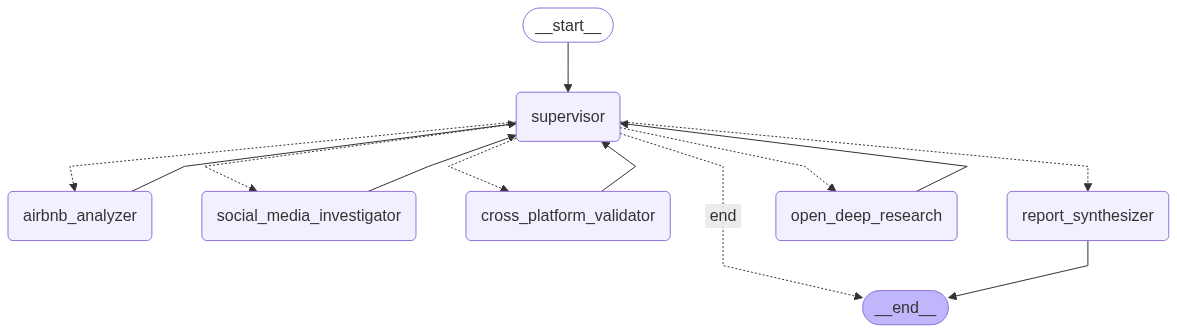

In [5]:
app

In [6]:
query = "Find the online identity of the hoster at https://www.airbnb.com/users/show/532236013"

initial_state = AgentState(
    original_query=query,
    plan=[],
    past_steps=[],
    aggregated_results={},
    final_report="",
    messages=[]
)

In [7]:
final_state = app.invoke(initial_state)



> Entering new AgentExecutor chain...
Thought: The task is to extract the profile details of the host with the URL https://www.airbnb.com/users/show/532236013. To accomplish this, I will use the get_airbnb_profile_details tool, which extracts comprehensive profile information from an Airbnb host's profile page.

Action: get_airbnb_profile_details
Action Input: https://www.airbnb.com/users/show/532236013{'name': 'Abdel', 'about_details': ["Where I've always wanted to go: The Moon", 'My work: Entrepreneur', 'For guests, I always: Receive them in person', 'Pets: Enzo, Malinois', 'Identity verified'], 'bio': "I'm Abdel, a passionate entrepreneur and Airbnb host in Marrakech. I offer apartments and riad ideally located (Izdihar, Gueliz, Medina, Palmeraie), combining modern comfort and Moroccan authenticity for a unique experience of the city.", 'profile_picture_url': 'https://a0.muscache.com/im/pictures/user/User/original/213a678f-2d3c-4b11-886e-df873b318aa4.jpeg?im_w=720'} Now that I hav

Worker Airbnb_Analyzer failed. Reassessing the plan.


 I have successfully completed my assignment and have gathered all necessary information. I should also mention any new, unexpected leads I discovered.

Final Answer: The host's name is Abdel, and he is a passionate entrepreneur and Airbnb host in Marrakech. He offers apartments and riads that combine modern comfort and Moroccan authenticity for a unique experience of the city. The host has visited several places, including London, Casablanca, Denpasar, Nusa Penida, Sukasada, Ubud, Oujda, and Imi Quaddar. The host's listings include luxury private riads, cozy flats, and charming rooms. The host has received positive reviews from guests, with many praising his kindness, helpfulness, and responsiveness. New potential leads include the usernames "Zouheir", "Hayat", "Shazmara", "Eloise", "Sarah", "City Relay", "Abdou", "Amine", "Joshua", and "Ronald", as well as the locations "Casablanca", "El Jadida", "London", "Denpasar", and "Ubud".

> Finished chain.


C:\Users\hafss\OneDrive\Desktop\stifi\multi-agent-system-for-identity-revelalion-and-reporting\src\multi_agents\agents\workers.py:66: RuntimeWarning: coroutine 'Pregel.ainvoke' was never awaited
  return {


GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [ ]:
from langchain_openai import ChatOpenAI
from multi_agents.constants.constants import Constants
llm = ChatOpenAI(
    base_url=Constants.OPENROUTER_BASE_URL,
    api_key=Constants.OPENROUTER_API_KEY,
    model_name=Constants.DEFAULT_MODEL,
    temperature=0.1,
    max_tokens=4096
)

AttributeError: type object 'Constants' has no attribute 'OPENROUTER_BASE_URL'

In [ ]:
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x741d7e7aae10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x741d69f9e750>, root_client=<openai.OpenAI object at 0x741d7e7b9340>, root_async_client=<openai.AsyncOpenAI object at 0x741d7e7ab590>, model_name='openai/gpt-4o', temperature=0.1, model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='https://openrouter.ai/api/v1', max_tokens=4096)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_messages([
            ("system", """You are an expert digital investigator supervisor. Analyze the user query and create a step-by-step investigation plan.
             
             Available worker agents:
             - airbnb_analyzer: For analyzing Airbnb profiles/listings
             - web_search_investigator: For performing web searches
             - social_media_investigator: For searching social media platforms
             - cross_platform_validator: For correlating data across platforms
             
             Respond with a JSON array of steps, each with 'agent' and 'inputs' fields."""),
            ("human", "{query}")
        ])
        


chain = prompt | llm 

In [ ]:

chain.invoke({"query": query})

AIMessage(content='```json\n[\n    {\n        "agent": "airbnb_analyzer",\n        "inputs": {\n            "url": "https://www.airbnb.com/users/show/532236013"\n        }\n    },\n    {\n        "agent": "web_search_investigator",\n        "inputs": {\n            "query": "Airbnb host 532236013"\n        }\n    },\n    {\n        "agent": "social_media_investigator",\n        "inputs": {\n            "query": "Airbnb host 532236013"\n        }\n    },\n    {\n        "agent": "cross_platform_validator",\n        "inputs": {\n            "data_sources": [\n                "airbnb_analyzer",\n                "web_search_investigator",\n                "social_media_investigator"\n            ]\n        }\n    }\n]\n```', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 166, 'prompt_tokens': 131, 'total_tokens': 297, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_predict

In [ ]:
llm.invoke(ChatPromptTemplate.from_messages('human','what is 3 + 4: '))

ValueError: Unsupported template format: what is 3 + 4: 

In [ ]:
from multi_agents.tools.airbnb_tools import get_airbnb_profile_details

In [ ]:
get_airbnb_profile_details.description

'Extracts comprehensive profile information from an Airbnb host\'s profile page.\n\nThis tool scrapes the main profile details including the host\'s name, bio, and \nstructured "About" section details (work, interests, home features, pets, verification status).\n\nArgs:\n    profile_url (str): The complete URL to the Airbnb host\'s profile page\n                      (e.g., "https://www.airbnb.com/users/show/123456789")\n\nReturns:\n    Optional[ProfileDetails]: A dictionary containing profile information with the following structure:\n        - name (str): Host\'s display name\n        - about_details (List[str]): List of structured details from About section \n          (work, destinations, home features, pets, verification status)\n        - bio (Optional[str]): Host\'s personal bio/description text, None if not available\n\n    Returns None if the profile page cannot be accessed or parsed.\n\nExample:\n    >>> get_airbnb_profile_details("https://www.airbnb.com/users/show/123456789"

In [ ]:
get_airbnb_profile_details.name

'get_airbnb_profile_details'